<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/handlebar/LSTM/Lstm__Handlebar_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For Vscode
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.plots import *



In [3]:
df = pd.read_csv('../../../data/handlebar/test_data.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
#df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,6.014236,6.574478,8.231262,2.489975,10.520126,13.761871,20.930115,14.719559,8.082825,...,12.943054,6.157883,3.739746,5.161896,14.901504,7.862564,7.503433,6.938400,7.805099,14.020447
1,0.0,10.625473,11.286270,9.720459,9.725250,16.768997,18.435349,4.319138,4.965576,3.998321,...,11.310211,9.979034,9.888046,15.418655,10.007767,13.421890,10.184937,14.628571,13.886368,8.542511
2,0.0,8.628708,8.638275,8.628708,8.633499,8.623917,8.614334,8.619125,8.623917,8.638275,...,8.623917,8.633499,8.633499,8.619125,8.614334,8.619125,8.633499,8.623917,8.628708,8.623917
3,0.0,14.681244,19.019547,12.038040,3.150772,3.960007,12.191269,15.318100,10.496185,2.442093,...,3.912125,5.554550,17.520767,18.612518,13.019669,7.402878,6.976700,8.781937,13.589493,10.295074
4,0.0,8.236053,9.227249,8.930374,9.342178,9.251190,8.978256,9.332596,9.131485,9.447525,...,8.322250,8.188171,8.327026,8.264786,8.245636,8.283936,8.360550,8.480270,8.370132,8.374924


In [4]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(df.iloc[:, 1:])
test_data_scaled.shape


(1864, 100)

In [5]:
# Convert the scaled data back to DataFrames for further processing
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=df.columns[1:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
test_data_scaled_df['curb_scene'] = df['curb_scene'].values
test_data_scaled_df.shape

(1864, 101)

In [6]:
# Filter and slice the data
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled.shape, abnormal_test_data_scaled.shape

((1796, 100), (68, 100))

In [7]:
# Cast to float32
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
normal_test_data_scaled.shape, abnormal_test_data_scaled.shape

((1796, 100), (68, 100))

In [8]:
import joblib
# Using joblib
loaded_model = joblib.load('../../../models/ocsvm_best.joblib')

In [9]:
# Predict on test dataneClassSVM returns 1 for inliers (normal) and -1 for outliers (abnormal)
# Note: O
# We'll convert these to 0 for normal and 1 for abnormal to match our original labels
normal_pred = loaded_model.predict(normal_test_data_scaled)
abnormal_pred = loaded_model.predict(abnormal_test_data_scaled)
print(normal_pred)
print(abnormal_pred)

[ 1  1  1 ... -1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [10]:
# Convert predictions from 1/-1 to 0/1
# np.where(condition, x, y), x if condition is True, else y
normal_pred = np.where(normal_pred == 1, 0, 1)
abnormal_pred = np.where(abnormal_pred == -1, 1, 0)
print(normal_pred)
print(abnormal_pred)

[0 0 0 ... 1 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
# Combine predictions and create true labels
y_pred = np.concatenate([normal_pred, abnormal_pred])
y_true = np.concatenate([np.zeros(len(normal_test_data_scaled)), 
                        np.ones(len(abnormal_test_data_scaled))])

In [15]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1796
         1.0       0.33      1.00      0.50        68

    accuracy                           0.93      1864
   macro avg       0.67      0.96      0.73      1864
weighted avg       0.98      0.93      0.94      1864



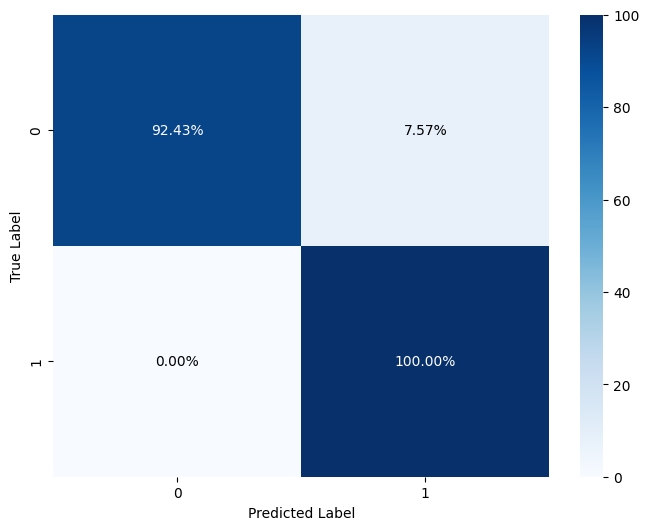

In [30]:
# Create confusion matrix with percentages
cm = confusion_matrix(y_true, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, 
            annot=False,  # Set annot to False to avoid double annotations
            cmap='Blues')

# Add percentage signs to annotations
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j: 
            text = plt.text(j + 0.5, i + 0.5,
                        f'{cm_percentage[i, j]:.2f}%',
                        ha='center',
                        va='center',
                        color='white')
        else:
            text = plt.text(j + 0.5, i + 0.5,
                        f'{cm_percentage[i, j]:.2f}%',
                        ha='center',
                        va='center',
                        color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()